### 1- Model Training

#### 1.1 Import Data and Required Packages

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2- Import the CSV Data as Pandas DataFrame

In [3]:
data = pd.read_csv("data/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### 1.2- Preparing X and Y variables

In [7]:
X = data.drop(columns = ["mpg"],axis=1)

In [8]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
y = data["mpg"]
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [12]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transform = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transform,cat_features),
        ("StandardScalar",num_transformer, num_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(398, 405)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((318, 405), (80, 405))

#### 1.3- Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_squart = r2_score(true, predicted)

    return r2_squart, rmse, mae

#### 1.3- Train models

In [31]:
models = {
    "LinearRegression": LinearRegression(),
    "lasso":Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVM":SVR()
}

model_list= []
r2_score_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2_score, train_rmse, train_mae = evaluate_model(y_train, y_train_pred)
    test_r2_score, test_rmse, test_mae = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2_score))
    r2_score_list.append(test_r2_score)
    
    print('='*35)
    print('\n')




LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.4357
- Mean Absolute Error: 0.1357
- R2 Score: 0.9970
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6638
- Mean Absolute Error: 5.1990
- R2 Score: 0.1741


lasso
Model performance for Training set
- Root Mean Squared Error: 3.6904
- Mean Absolute Error: 2.7263
- R2 Score: 0.7828
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.9509
- Mean Absolute Error: 2.2471
- R2 Score: 0.8380


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.5471
- Mean Absolute Error: 1.1637
- R2 Score: 0.9618
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.8004
- Mean Absolute Error: 2.1169
- R2 Score: 0.8541


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 2.6012
- Mean Absolute Error: 1.8717
- R2 Score: 0.8921
--------------------------

In [32]:
pd.DataFrame(list(zip(model_list, r2_score_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,RandomForestRegressor,0.925135
3,KNeighborsRegressor,0.895955
6,AdaBoostRegressor,0.873012
4,DecisionTreeRegressor,0.858281
2,Ridge,0.854144
7,SVM,0.849618
1,lasso,0.838045
0,LinearRegression,0.174102


In [33]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 92.94


Text(0, 0.5, 'Predicted')

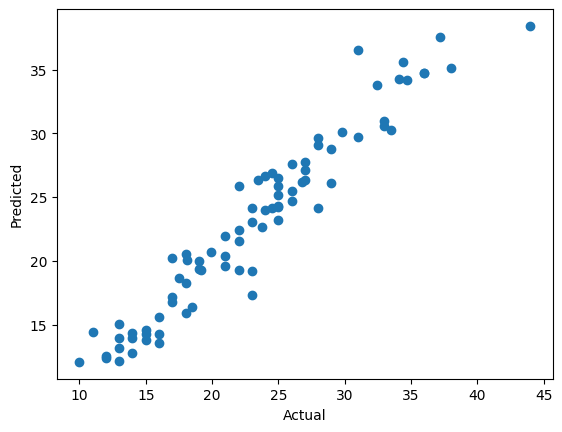

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='mpg'>

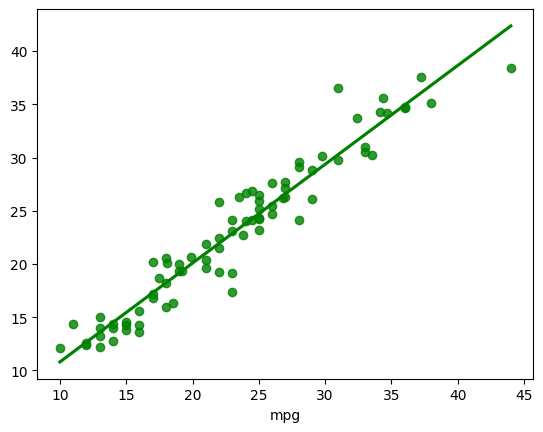

In [39]:
sns.regplot(x=y_test, y=y_pred,ci=None, color="green")